In [1]:
#load all data from file

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x_values = []
y_values = []
x_test, x_train, x_val = (None, None, None)
y_test, y_train, y_val = (None, None, None)

val_ratio = 0.2
test_ratio = 0.2
number_sample = 0
tflite_model_name = "sleep_tracking_model"
c_model_name = "sleep_tracking_model"
data_path = "data/output2"
file_names = os.listdir(data_path)

for file_name in file_names:
    if file_name.endswith(".csv"):
        filePath = os.path.join(data_path, file_name)
        file_name = file_name.split('.')[0][:2]
        if file_name == "AN":
            y_values.append(1)
        elif file_name == "NM":
            y_values.append(0)

        df = pd.read_csv(filePath)
        df = df.drop(labels="STT", axis=1)
        x_values.append(df.values)

number_sample = len(x_values)
print("Number of csv files read: ", len(x_values))
print("Number of csv files read: ", len(y_values))
print("Number sample: ", number_sample)
x_values = np.array(x_values)
y_values = np.array(y_values)
print(x_values.shape)


Number of csv files read:  45
Number of csv files read:  45
Number sample:  45
(45, 2000, 6)


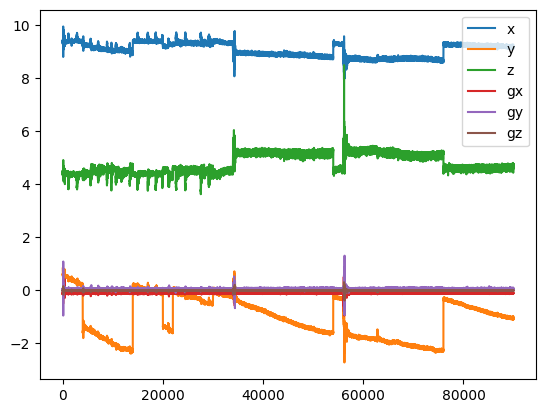

In [2]:
x_in_x = []
y_in_x = []
z_in_x = []

gx_in_x = []
gy_in_x = []
gz_in_x = []

for data_row in x_values:
    for point in data_row:
        x_in_x.append(point[0])
        y_in_x.append(point[1])
        z_in_x.append(point[2])

        gx_in_x.append(point[3])
        gy_in_x.append(point[4])
        gz_in_x.append(point[5])


plt.plot(x_in_x, label="x")
plt.plot(y_in_x, label="y")
plt.plot(z_in_x, label="z")
plt.plot(gx_in_x, label="gx")
plt.plot(gy_in_x, label="gy")
plt.plot(gz_in_x, label="gz")

plt.legend()
plt.show()



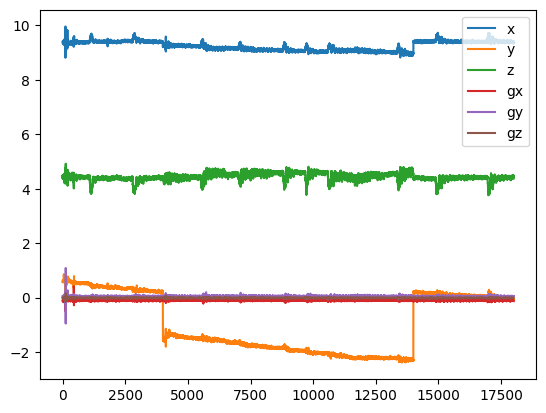

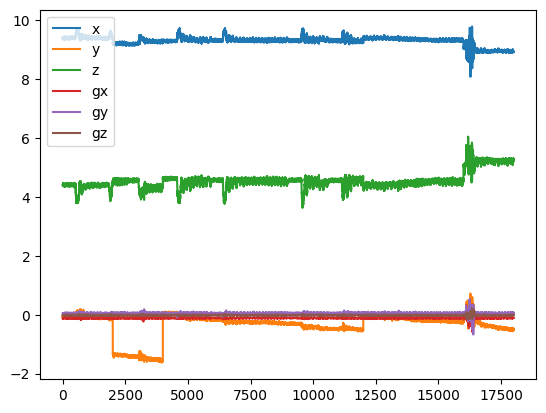

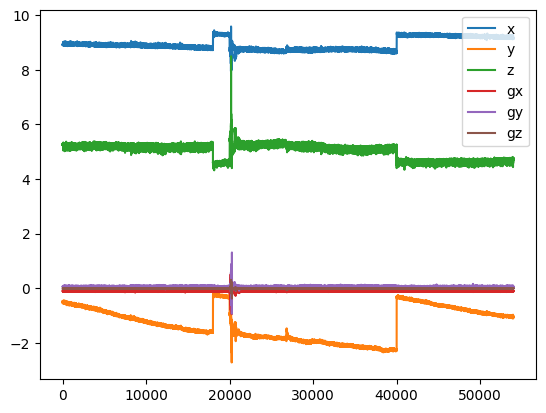

In [3]:
_val_split = int(val_ratio * len(x_in_x))
_test_split = int(test_ratio * len(x_in_x))

xxVal, xxTest, xxTrain = np.array_split(x_in_x, (np.cumsum(np.round(np.array([val_ratio, test_ratio]) * len(x_in_x))).astype(int)))
yxVal, yxTest, yxTrain = np.array_split(y_in_x, (np.cumsum(np.round(np.array([val_ratio, test_ratio]) * len(y_in_x))).astype(int)))
zxVal, zxTest, zxTrain =  np.array_split(z_in_x, (np.cumsum(np.round(np.array([val_ratio, test_ratio]) * len(z_in_x))).astype(int)))

gxxVal, gxxTest, gxxTrain =  np.array_split(gx_in_x, (np.cumsum(np.round(np.array([val_ratio, test_ratio]) * len(gx_in_x))).astype(int)))
gyxVal, gyxTest, gyxTrain =  np.array_split(gy_in_x, (np.cumsum(np.round(np.array([val_ratio, test_ratio]) * len(gy_in_x))).astype(int)))
gzxVal, gzxTest, gzxTrain =  np.array_split(gz_in_x, (np.cumsum(np.round(np.array([val_ratio, test_ratio]) * len(gz_in_x))).astype(int)))

plt.plot(xxVal, label="x")
plt.plot(yxVal, label="y")
plt.plot(zxVal, label="z")
plt.plot(gxxVal, label="gx")
plt.plot(gyxVal, label="gy")
plt.plot(gzxVal, label="gz")
plt.legend()
plt.show()

plt.plot(xxTest, label="x")
plt.plot(yxTest, label="y")
plt.plot(zxTest, label="z")
plt.plot(gxxTest, label="gx")
plt.plot(gyxTest, label="gy")
plt.plot(gzxTest, label="gz")
plt.legend()
plt.show()

plt.plot(xxTrain, label="x")
plt.plot(yxTrain, label="y")
plt.plot(zxTrain, label="z")
plt.plot(gxxTrain, label="gx")
plt.plot(gyxTrain, label="gy")
plt.plot(gzxTrain, label="gz")
plt.legend()
plt.show()


In [4]:
# flattern x values

print(x_values.shape)
x_values_flattern = x_values.reshape(x_values.shape[0], -1)
print(x_values_flattern.shape)

(45, 2000, 6)
(45, 12000)


In [69]:
# scale data

val_min = np.min(x_values_flattern)
print(val_min)
x_values_flattern += abs(val_min)
val_min = np.min(x_values_flattern)
print(val_min)
val_max = np.max(x_values_flattern)
print(val_max)
x_values_flattern *= 10
# x_values_flattern /= val_max
val_max = np.max(x_values_flattern)
print(val_max)

0.0
0.0
0.9763406940063091
9.76340694006309


In [77]:
#random position of data ponts
import random

for i in range(number_sample):
    tmp = random.randint(0, number_sample - 1)
    tmp2 = x_values_flattern[i]
    x_values_flattern[i] = x_values_flattern[tmp]
    x_values_flattern[tmp] = tmp2
    tmp3 = y_values[i]
    y_values[i] = y_values[tmp]
    y_values[tmp] = tmp3

(45, 12000)
(9, 12000) (27, 12000) (9, 12000)
(9,) (27,) (9,)


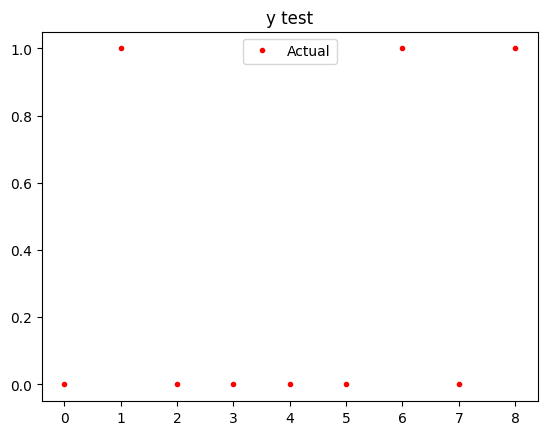

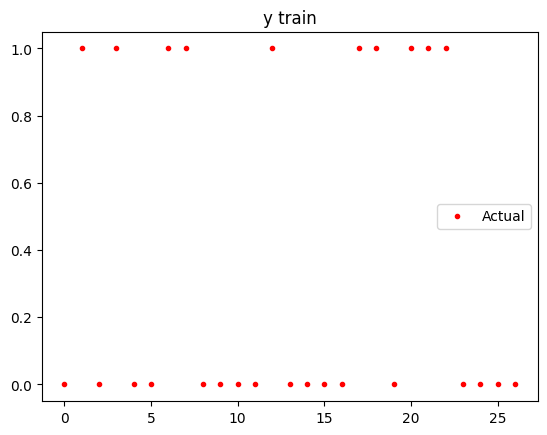

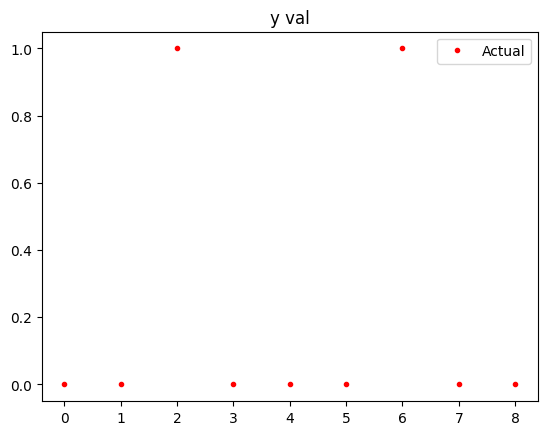

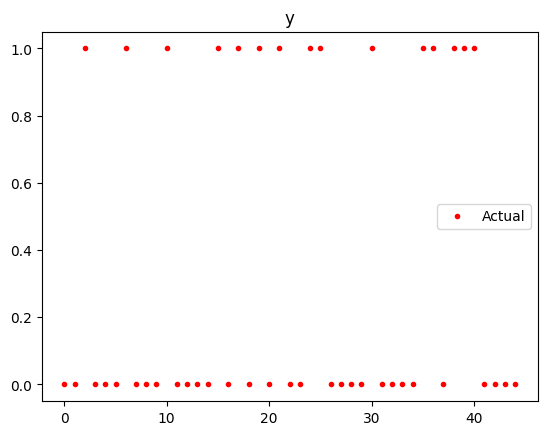

In [78]:
# split data flattern to 1d [ax1, ay1, az1, gx1, gy1, gz1, ax1, ay1, az1, gx1, gy1, gz1]

val_split = int(val_ratio * number_sample)
test_split = int(test_ratio * number_sample)

# x_values_flattern_NM = []
# x_values_flattern_AN = []

# for i in range(len(y_values)):
#     if y_values[i] == 1:
#         x_values_flattern_AN.append(x_values_flattern[i])
#     else:
#         x_values_flattern_NM.append(x_values_flattern[i])

# x_values_flattern_AN = np.array(x_values_flattern_AN)
# x_values_flattern_NM = np.array(x_values_flattern_NM)

# print(x_values_flattern_AN.shape)
# print(x_values_flattern_NM.shape)

print(x_values_flattern.shape)
x_val, x_test, x_train = np.array_split(x_values_flattern, (np.cumsum(np.round(np.array([0.2, 0.2]) * len(x_values_flattern))).astype(int)))
y_val, y_test, y_train = np.array_split(y_values, (np.cumsum(np.round(np.array([0.2, 0.2]) * len(y_values))).astype(int)))

print(x_val.shape, x_train.shape, x_test.shape)
print(y_val.shape, y_train.shape, y_test.shape)

plt.clf()
plt.title("y test")
plt.plot(range(len(y_test)), y_test, 'r.', label='Actual')
plt.legend()
plt.show()

plt.clf()
plt.title("y train")
plt.plot(range(len(y_train)), y_train, 'r.', label='Actual')
plt.legend()
plt.show()

plt.clf()
plt.title("y val")
plt.plot(range(len(y_val)), y_val, 'r.', label='Actual')
plt.legend()
plt.show()

plt.clf()
plt.title("y")
plt.plot(range(len(y_values)), y_values, 'r.', label='Actual')
plt.legend()
plt.show()

# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x_values_flattern, y_values, test_size=0.2, random_state=42, stratify=y_values)

# print(x_train[:20])


0.2917981072555206 0.2917981072555206 0.2917981072555206


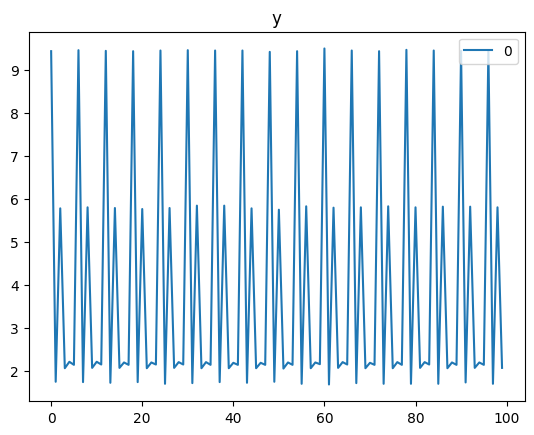

In [112]:
#check range of value

print(np.min(x_val),np.min(x_test),np.min(x_train) )

plt.clf()
plt.title("y")
id = "0"
for i in x_val:
    plt.plot(i[:100], label=id)
    id += "_"
plt.legend()
plt.show()


In [97]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, MaxPool1D, AveragePooling1D

inputShape = (12000,1)
filters = 12
kernelSize = 6

model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv1D(filters = filters, kernel_size = kernelSize, input_shape=inputShape, activation="relu"))
model.add(AveragePooling1D(pool_size=2))
model.add(tf.keras.layers.Conv1D(filters = filters, kernel_size = 2, activation="relu"))
model.add(AveragePooling1D(pool_size=2))
model.add(tf.keras.layers.Conv1D(filters = filters, kernel_size = 2, activation="relu"))
model.add(AveragePooling1D(pool_size=2))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mae', optimizer='rmsprop', metrics=['accuracy'])
#model.compile(optimizer='rmsprop', loss='mae', metrics=['mae'])

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 32)                384032    
                                                                 
 dense_31 (Dense)            (None, 16)                528       
                                                                 
 dense_32 (Dense)            (None, 16)                272       
                                                                 
 dense_33 (Dense)            (None, 1)                 17        
                                                                 
Total params: 384849 (1.47 MB)
Trainable params: 384849 (1.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [98]:
# Huấn luyện mô hình
history = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_val, y_val))

# Đánh giá mô hình trên dữ liệu kiểm tra
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/100
1/1 [==============================] - 1s 685ms/step - loss: 8.0983 - mae: 8.0983 - val_loss: 22.9636 - val_mae: 22.9636
Epoch 2/100
1/1 [==============================] - 0s 39ms/step - loss: 23.1620 - mae: 23.1620 - val_loss: 11.7177 - val_mae: 11.7177
Epoch 3/100
1/1 [==============================] - 0s 36ms/step - loss: 11.5956 - mae: 11.5956 - val_loss: 17.8449 - val_mae: 17.8449
Epoch 4/100
1/1 [==============================] - 0s 36ms/step - loss: 18.0334 - mae: 18.0334 - val_loss: 9.3134 - val_mae: 9.3134
Epoch 5/100
1/1 [==============================] - 0s 42ms/step - loss: 9.1875 - mae: 9.1875 - val_loss: 9.8460 - val_mae: 9.8460
Epoch 6/100
1/1 [==============================] - 0s 42ms/step - loss: 10.0167 - mae: 10.0167 - val_loss: 10.0013 - val_mae: 10.0013
Epoch 7/100
1/1 [==============================] - 0s 42ms/step - loss: 9.8762 - mae: 9.8762 - val_loss: 5.8423 - val_mae: 5.8423
Epoch 8/100
1/1 [==============================] - 0s 41ms/step - loss: 5

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


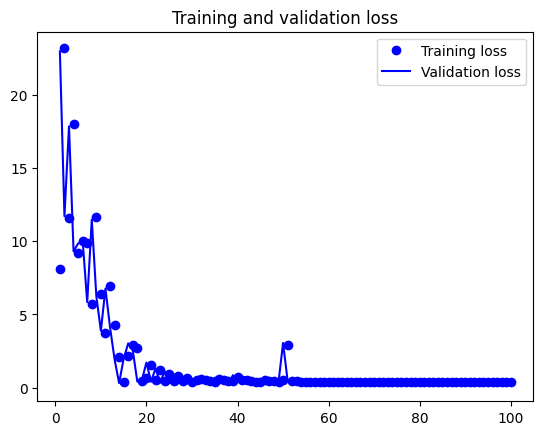

In [99]:
print(history.history.keys())

# Plot the training history
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 72ms/step
[[-0.00076486]
 [-0.00076486]
 [-0.00076486]
 [-0.00076486]
 [-0.00076486]
 [-0.00076486]
 [-0.00076486]
 [-0.00076486]
 [-0.00076486]]
[0 1 0 0 0 0 1 0 1]


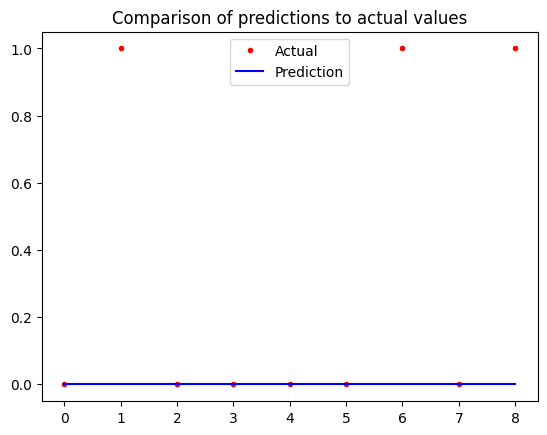

In [100]:
# Plot predictions against actual values
predictions = model.predict(x_test)

xLabel = range(len(x_test))

print(predictions)
print(y_test)

plt.clf()
plt.title("Comparison of predictions to actual values")
plt.plot(xLabel, y_test, 'r.', label='Actual')
plt.plot(xLabel, predictions, 'b', label='Prediction')
plt.legend()
plt.show()